In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)  # يجب أن يظهر 2.18.0


2.18.0


In [2]:
# ===============================
# MNIST Deep Learning Mastery with Saved Results
# ===============================
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks

# -------------------------------
# 0️⃣ إنشاء المجلدات اللازمة
# -------------------------------
folders = [
    'results/predictions/',
    'results/loss_curves/',
    'results/optimizer_tests/',
    'results/weights/'
]
for f in folders:
    os.makedirs(f, exist_ok=True)

# -------------------------------
# 1️⃣ تحميل البيانات
# -------------------------------
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# تحويل الأبعاد
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# -------------------------------
# 2️⃣ إنشاء نموذج أساسي
# -------------------------------
def create_model(dropout_rate=0.0, l2_lambda=0.0, activation='relu'):
    model = keras.Sequential([
        layers.Dense(128, activation=activation,
                     kernel_regularizer=regularizers.l2(l2_lambda),
                     input_shape=(28*28,)),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation=activation,
                     kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# -------------------------------
# 3️⃣ Task 1 — Deep Prediction Analysis
# -------------------------------
model = create_model()
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=0)

indices = [5, 23, 87]
for idx in indices:
    sample = x_test[idx].reshape(1, 28*28)
    pred = model.predict(sample, verbose=0)
    predicted_label = np.argmax(pred)
    true_label = y_test[idx]
    print(f"Sample {idx}: Predicted={predicted_label}, True={true_label}")
    
    # حفظ صورة العينة
    plt.imshow(sample.reshape(28,28), cmap='gray')
    plt.title(f'Predicted={predicted_label}, True={true_label}')
    plt.axis('off')
    plt.savefig(f'results/predictions/sample_{idx}.png')
    plt.close()

# -------------------------------
# 4️⃣ Task 3 — Epoch Exploration
# -------------------------------
for epochs in [5, 10, 20]:
    model = create_model()
    history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.1, verbose=0)
    
    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'Loss curves for {epochs} epochs')
    plt.legend()
    plt.savefig(f'results/loss_curves/loss_{epochs}_epochs.png')
    plt.close()

# -------------------------------
# 5️⃣ Task 4 — EarlyStopping
# -------------------------------
early_stop = callbacks.EarlyStopping(patience=3, restore_best_weights=True)
model = create_model()
history = model.fit(x_train, y_train, epochs=50, validation_split=0.1,
                    callbacks=[early_stop], verbose=0)
print(f"Training stopped at epoch: {len(history.history['loss'])}")

plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title(f'EarlyStopping (patience=3)')
plt.legend()
plt.savefig('results/loss_curves/early_stopping.png')
plt.close()

# -------------------------------
# 6️⃣ Task 5 — Dropout Ablation
# -------------------------------
for rate in [0.0, 0.1, 0.3]:
    model = create_model(dropout_rate=rate)
    history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=0)
    
    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'Dropout={rate}')
    plt.legend()
    plt.savefig(f'results/loss_curves/dropout_{rate}.png')
    plt.close()

# -------------------------------
# 7️⃣ Task 6 — L2 Regularization
# -------------------------------
for l2_lambda in [0.0001, 0.001, 0.01]:
    model = create_model(l2_lambda=l2_lambda)
    history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=0)
    
    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'L2 lambda={l2_lambda}')
    plt.legend()
    plt.savefig(f'results/loss_curves/l2_{l2_lambda}.png')
    plt.close()

# -------------------------------
# 8️⃣ Task 7 — Optimizer Comparison
# -------------------------------
optimizers = {
    'SGD': keras.optimizers.SGD(learning_rate=0.01),
    'SGD+Momentum': keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Adam': keras.optimizers.Adam(),
    'AdamW': keras.optimizers.AdamW()
}

for name, opt in optimizers.items():
    model = create_model()
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=0)
    
    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'Optimizer={name}')
    plt.legend()
    plt.savefig(f'results/optimizer_tests/{name}.png')
    plt.close()

# -------------------------------
# 9️⃣ Task 9 — Activation Function Swap
# -------------------------------
for act in ['tanh', 'softsign', 'gelu']:
    model = create_model(activation=act)
    history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=0)
    
    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'Activation={act}')
    plt.legend()
    plt.savefig(f'results/loss_curves/activation_{act}.png')
    plt.close()

# -------------------------------
# 10️⃣ Task 10 — Inspect Weights
# -------------------------------
w, b = model.layers[0].get_weights()
print(f"First Dense layer weights shape: {w.shape}")

plt.figure(figsize=(10,8))
plt.imshow(w, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Heatmap of First Dense Layer Weights")
plt.savefig('results/weights/first_dense_weights.png')
plt.close()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


C:\Users\LEGION\.anaconda\anacoda 4\envs\tf\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sample 5: Predicted=1, True=1
Sample 23: Predicted=5, True=5
Sample 87: Predicted=3, True=3
Training stopped at epoch: 8
First Dense layer weights shape: (784, 128)



Training model for 5 epochs...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9270 - loss: 0.2520 - val_accuracy: 0.9683 - val_loss: 0.1118
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9668 - loss: 0.1063 - val_accuracy: 0.9715 - val_loss: 0.0933
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9771 - loss: 0.0740 - val_accuracy: 0.9773 - val_loss: 0.0786
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9813 - loss: 0.0577 - val_accuracy: 0.9750 - val_loss: 0.0867
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9859 - loss: 0.0434 - val_accuracy: 0.9773 - val_loss: 0.0842


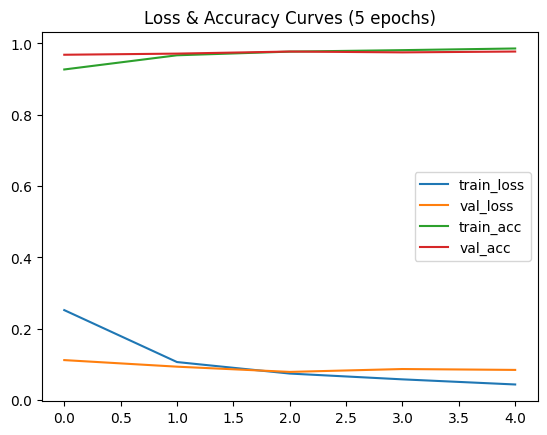


Training model for 10 epochs...
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9270 - loss: 0.2479 - val_accuracy: 0.9655 - val_loss: 0.1144
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9683 - loss: 0.1023 - val_accuracy: 0.9735 - val_loss: 0.0861
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9785 - loss: 0.0703 - val_accuracy: 0.9778 - val_loss: 0.0804
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9825 - loss: 0.0550 - val_accuracy: 0.9782 - val_loss: 0.0758
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9864 - loss: 0.0426 - val_accuracy: 0.9783 - val_loss: 0.0806
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0347 - val_accuracy: 0.9763 - val_loss: 0.0830
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9904 - loss: 0.0278 - val_accuracy: 0.9787 - val_loss: 0.0759
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - a

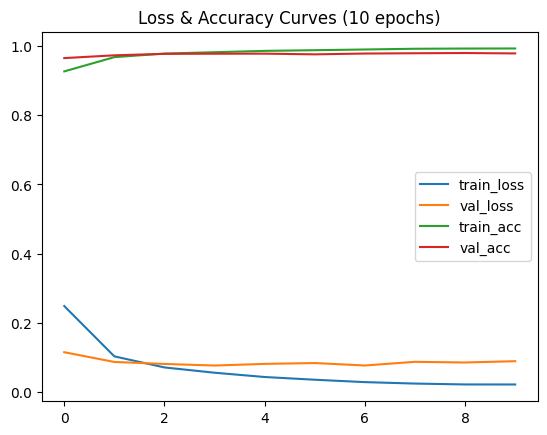


Training model for 20 epochs...
Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9251 - loss: 0.2533 - val_accuracy: 0.9670 - val_loss: 0.1144
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9676 - loss: 0.1052 - val_accuracy: 0.9710 - val_loss: 0.0927
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9776 - loss: 0.0722 - val_accuracy: 0.9735 - val_loss: 0.0906
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9824 - loss: 0.0546 - val_accuracy: 0.9778 - val_loss: 0.0738
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9856 - loss: 0.0440 - val_accuracy: 0.9783 - val_loss: 0.0872
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9887 - loss: 0.0353 - val_accuracy: 0.9735 - val_loss: 0.0936
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9904 - loss: 0.0291 - val_accuracy: 0.9775 - val_loss: 0.0996
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - a

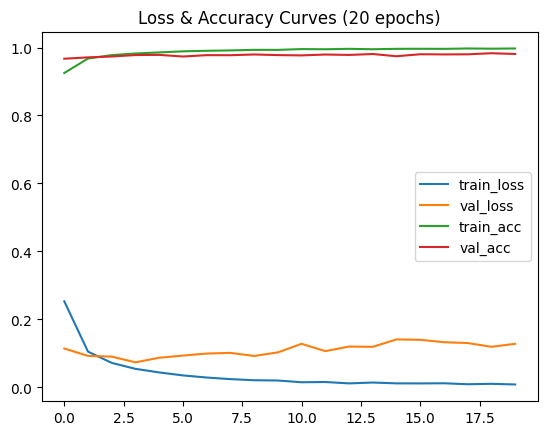

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9971 - loss: 0.0082 - val_accuracy: 0.9783 - val_loss: 0.1488
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9967 - loss: 0.0097 - val_accuracy: 0.9767 - val_loss: 0.1744
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9785 - val_loss: 0.1403
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9971 - loss: 0.0081 - val_accuracy: 0.9793 - val_loss: 0.1557
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9980 - loss: 0.0066 - val_accuracy: 0.9808 - val_loss: 0.1406
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.9813 - val_loss: 0.1331
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9979 - loss: 0.0074 - val_accuracy: 0.9798 - val_loss: 0.1499
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9973 - loss: 0.0089 - 

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks

# -------------------------------
# إنشاء المجلدات
# -------------------------------
folders = [
    'results/predictions/',
    'results/loss_curves/',
    'results/optimizer_tests/',
    'results/weights/'
]
for f in folders:
    os.makedirs(f, exist_ok=True)

# -------------------------------
# تحميل بيانات MNIST
# -------------------------------
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# -------------------------------
# دالة لإنشاء النموذج
# -------------------------------
def create_model(dropout_rate=0.0, l2_lambda=0.0, activation='relu', optimizer='adam'):
    model = keras.Sequential([
        layers.Dense(128, activation=activation, kernel_regularizer=regularizers.l2(l2_lambda), input_shape=(28*28,)),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation=activation, kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# -------------------------------
# Task 3 — Epoch-Based Learning Curves
# -------------------------------
for epochs in [5, 10, 20]:
    print(f"\nTraining model for {epochs} epochs...")
    model = create_model()
    history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.1, verbose=1)
    
    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title(f'Loss & Accuracy Curves ({epochs} epochs)')
    plt.legend()
    plt.savefig(f'results/loss_curves/epochs_{epochs}.png')
    plt.show()

# -------------------------------
# Task 4 — EarlyStopping
# -------------------------------
from tensorflow.keras import callbacks

early_stop = callbacks.EarlyStopping(
    patience=3, 
    restore_best_weights=True
)
history = model.fit(
    x_train, y_train,
    epochs=50,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)



In [4]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

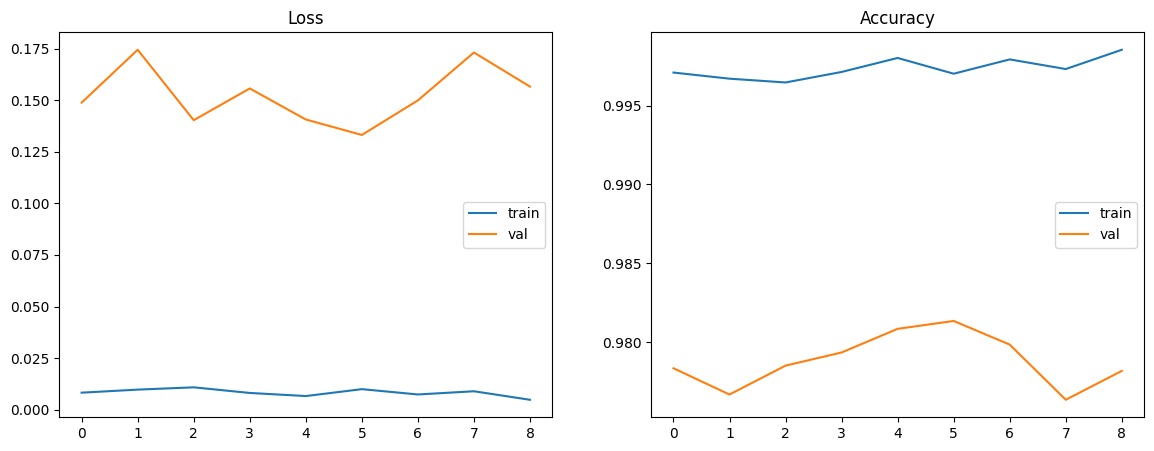

In [5]:
plt.figure(figsize=(14,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.legend(["train","val"])

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.legend(["train","val"])

plt.show()


In [6]:
import os
os.listdir()


['.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.idea',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.matplotlib',
 '.virtual_documents',
 '.vscode',
 '01- Matplotlib basics - Data Visualization.ipynb',
 '02. Practical in session(Student Dataset).ipynb',
 '03 - Practical Task in session (Data Preprocessing Sales Dataset).ipynb',
 '1_Plotly_Basics.ipynb',
 '2_Plotly_Basics.ipynb',
 '3- decision-trees-random-forest-for-beginners.ipynb',
 'anaconda3',
 'AppData',
 'Application Data',
 'bi.csv',
 'Contacts',
 'Cookies',
 'customer_shopping_data.csv',
 'customer_shopping_data.csv.zip',
 'Dashboards Practical and Assignment.ipynb',
 'data dictionary.xlsx',
 'Data_clean.py',
 'data_pipeline.py',
 'Documents',
 'Downloads',
 'EmployeeProject',
 'employees.csv',
 'employees_real.csv',
 'employee_manager-Copy1.py',
 'employee_manager-Copy2.py',
 'employee_manager.py',
 'Favorites',
 'for_loop_exercises.ipynb',
 'Foundations of Deep Learning_ Neural Networks, O

In [7]:
import os
os.listdir("results")


['loss_curves', 'optimizer_tests', 'predictions', 'weights']

In [8]:
import os

# ---------------------------
# Create main project folders
# ---------------------------
base = "project"
subfolders = [
    "results/predictions",
    "results/loss_curves",
    "results/optimizer_tests",
    "submission"
]

# Create folders
for folder in subfolders:
    path = os.path.join(base, folder)
    os.makedirs(path, exist_ok=True)

# ---------------------------
# Create README.md
# ---------------------------
readme_path = os.path.join(base, "README.md")
with open(readme_path, "w", encoding="utf-8") as f:
    f.write("# MNIST Deep Learning Project\n\nThis project contains 10 tasks including predictions, regularization, optimizers, and more.\n")

# ---------------------------
# Create empty notebook
# ---------------------------
nb_path = os.path.join(base, "notebook.ipynb")
with open(nb_path, "w", encoding="utf-8") as f:
    f.write("{}")  # empty JSON to appear as notebook

# ---------------------------
# Create submission task files
# ---------------------------
tasks = [
    "Task01_PredictionAnalysis.md",
    "Task02_CustomDigit.md",
    "Task03_Epochs.md",
    "Task04_EarlyStopping.md",
    "Task05_Dropout.md",
    "Task06_L2.md",
    "Task07_Optimizers.md",
    "Task08_BatchSize.md",
    "Task09_Activations.md",
    "Task10_Weights.md",
]

for t in tasks:
    path = os.path.join(base, "submission", t)
    with open(path, "w", encoding="utf-8") as f:
        f.write(f"# {t.replace('_', ' ').replace('.md','')}\n\n")

print("🎉 Project structure created successfully!")


🎉 Project structure created successfully!


In [9]:
import shutil

shutil.make_archive("project_export", "zip", "project")


'C:\\Users\\LEGION\\project_export.zip'

In [11]:
from IPython.display import FileLink
FileLink("project_export.zip")


C:\Users\LEGION\project_export.zip